# **Multi-inference implicit chain of reasoning demonstration**

Here I attempt to solve this challenge [here](https://yuntiandeng.com/cv/challenge.png) by referencing the research paper and source code linked below.

| ||
|----------|----------|
| Research Credit | [here](https://arxiv.org/pdf/2311.01460.pdf) |
| Code Inspiration Credit | [github](https://github.com/da03/implicit_chain_of_thought/tree/main) |

In [1]:
import sys
import os

#For safe imports
notebook_directory = os.getcwd()
parent_directory = os.path.dirname(notebook_directory)
sys.path.insert(False, parent_directory)


In [2]:
parent_directory = os.path.dirname(notebook_directory)

### **Dataset Generation**
Here we generate our test and train data. We generate our training data randomly such that it represents less than **1%** of possible observations. We also generate our tokenized data here as well.

---

The format of training and test datasets follow this format:

```
[input 1a] $$$ [input 1b]||[CoT 1a] $$$ [CoT 1b] #### [output 1a] $$$ [output 1b]
[input 2a] $$$ [input 2b]||[CoT 2a] $$$ [CoT 2b] #### [output 2a] $$$ [output 2b]
[input 3a] $$$ [input 3b]||[CoT 3a] $$$ [CoT 3b] #### [output 3a] $$$ [output 3b]
```

We can also test any particular case using the DatasetHandler. We create a custom prediction dataset as well.

In [3]:
from data.data import DatasetHandler
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('gpt2')

training_data_size = 7770
test_data_size = 770

datahandler_train = DatasetHandler(tokenizer = tokenizer, parent_path = parent_directory, max_len = 1024, type = 'train')
datahandler_test = DatasetHandler(tokenizer = tokenizer, parent_path = parent_directory, max_len = 1024, type = 'test')

Now we generate datasets for each handler.

In [4]:
datahandler_train.generateDataset(size = training_data_size)
datahandler_test.generateDataset(size = test_data_size)

Generated raw train dataset saved at c:\Users\Luke\multi_implicit_cot\data\raw_train_dataset.txt of size 7770.
Creating tokenized features from dataset file at c:\Users\Luke\multi_implicit_cot\data\raw_train_dataset.txt
tgt_avg:  21.0
src_avg:  13.0
ratios:  0.6190476190476191
tgt_avg:  15.0
src_avg:  13.0
ratios:  0.8666666666666667
---------------------------
Example features:
Full entry:  7 1 * 5 2 $$$ 4 0 * 0 2 <|endoftext|> 5 8 0 + 0 4 3 0 $$$ 0 0 0 + 0 8 0 0 <|endoftext|> #### 5 2 4 0 $$$ 0 8 0 0 <|endoftext|>
No CoT:  7 1 * 5 2 $$$ 4 0 * 0 2 <|endoftext|> #### 5 2 4 0 $$$ 0 8 0 0 <|endoftext|>
Only CoT:  7 1 * 5 2 $$$ 4 0 * 0 2 <|endoftext|> 5 8 0 + 0 4 3 0 $$$ 0 0 0 + 0 8 0 0 <|endoftext|>
Product input:  7 1 * 5 2 $$$ 4 0 * 0 2 <|endoftext|> 
---------------------------
Generated raw test dataset saved at c:\Users\Luke\multi_implicit_cot\data\raw_test_dataset.txt of size 770.
Creating tokenized features from dataset file at c:\Users\Luke\multi_implicit_cot\data\raw_test_datase

Here we allow the creation of a custom prediction. The custom prediction is of the form **a*b** and **c*d**.

In [5]:
#Custom prediction 
a=10
b=5
c=9
d=98

custom_prediction = DatasetHandler(tokenizer = tokenizer, parent_path = parent_directory, max_len = 1024, type = 'custom')
custom_prediction.generateDataset(a=10, b=5, c=9, d=98)

Generated raw custom dataset saved at c:\Users\Luke\multi_implicit_cot\data\raw_custom_dataset.txt of size 1.
Creating tokenized features from dataset file at c:\Users\Luke\multi_implicit_cot\data\raw_custom_dataset.txt
tgt_avg:  21.0
src_avg:  13.0
ratios:  0.6190476190476191
tgt_avg:  15.0
src_avg:  13.0
ratios:  0.8666666666666667
---------------------------
Example features:
Full entry:  0 1 * 5 0 $$$ 9 0 * 8 9 <|endoftext|> 0 5 0 + 0 0 0 0 $$$ 2 7 0 + 0 1 8 0 <|endoftext|> #### 0 5 0 0 $$$ 2 8 8 0 <|endoftext|>
No CoT:  0 1 * 5 0 $$$ 9 0 * 8 9 <|endoftext|> #### 0 5 0 0 $$$ 2 8 8 0 <|endoftext|>
Only CoT:  0 1 * 5 0 $$$ 9 0 * 8 9 <|endoftext|> 0 5 0 + 0 0 0 0 $$$ 2 7 0 + 0 1 8 0 <|endoftext|>
Product input:  0 1 * 5 0 $$$ 9 0 * 8 9 <|endoftext|> 
---------------------------


### **Model Training**
Here we begin training our individual models.

---


In [6]:
from source.teacher import Teacher
from source.configurations import TeacherConfig

from source.thought_emulator import ThoughtEmulator
from source.configurations import ThoughtEmulatorConfig

from source.mindreading_emulator import MindReadingEmulator
from source.configurations import MindReadingEmulatorConfig


In [7]:
teacher_config = TeacherConfig()
teacher_model = Teacher(teacher_config)

t_emulator_config = ThoughtEmulatorConfig()
t_emulator_model = ThoughtEmulator(t_emulator_config, teacher_model)

mr_emulator_config = MindReadingEmulatorConfig()
mr_emulator_model = MindReadingEmulator(t_emulator_config, teacher_model)

##### **Teacher Model**
This model takes in inputs and generates a CoT and product as output.

  0%|          | 1/243 [00:01<05:55,  1.47s/it]

Step: 0. PPL: 98.405487. Training Accuracy: 0.148897


 10%|█         | 25/243 [00:08<01:06,  3.26it/s]

Step: 24. PPL: 3.381188. Training Accuracy: 0.602022


 20%|██        | 49/243 [00:16<00:59,  3.27it/s]

Step: 48. PPL: 3.055602. Training Accuracy: 0.605699


 30%|███       | 73/243 [00:23<00:55,  3.04it/s]

Step: 72. PPL: 2.811810. Training Accuracy: 0.630515


 40%|███▉      | 97/243 [00:31<00:47,  3.09it/s]

Step: 96. PPL: 2.395706. Training Accuracy: 0.682904


 50%|████▉     | 121/243 [00:39<00:39,  3.12it/s]

Step: 120. PPL: 2.456820. Training Accuracy: 0.658088


 60%|█████▉    | 145/243 [00:46<00:30,  3.20it/s]

Step: 144. PPL: 2.131532. Training Accuracy: 0.729779


 70%|██████▉   | 169/243 [00:54<00:22,  3.25it/s]

Step: 168. PPL: 2.129733. Training Accuracy: 0.723346


 79%|███████▉  | 193/243 [01:01<00:15,  3.28it/s]

Step: 192. PPL: 1.888085. Training Accuracy: 0.767463


 89%|████████▉ | 217/243 [01:08<00:07,  3.26it/s]

Step: 216. PPL: 1.833695. Training Accuracy: 0.766544


 99%|█████████▉| 241/243 [01:16<00:00,  3.13it/s]

Step: 240. PPL: 1.728178. Training Accuracy: 0.794118


100%|██████████| 243/243 [01:17<00:00,  3.15it/s]


Evaluating test dataset now...


  4%|▍         | 1/25 [00:00<00:12,  1.95it/s]

Input:  3 4 * 0 4 $$$ 1 7 * 1 2 
Target:  0 0 0 + 0 2 7 1 $$$ 1 7 0 + 0 2 4 1  #### 0 2 7 1 $$$ 1 9 4 1 
Predicted:  0 0 0 + 0 8 0 2 $$$ 1 7 0 + 0 2 7 1  #### 0 8 0 2 $$$ 1 8 7 1 



  8%|▊         | 2/25 [00:01<00:12,  1.85it/s]

Input:  0 9 * 0 7 $$$ 9 1 * 2 5 
Target:  0 0 0 + 0 0 3 6 $$$ 8 3 0 + 0 5 9 0  #### 0 0 3 6 $$$ 8 8 9 0 
Predicted:  0 0 0 + 0 0 7 6 $$$ 4 9 0 + 0 5 9 0  #### 0 0 7 6 $$$ 4 0 0 1 



 12%|█▏        | 3/25 [00:01<00:11,  1.92it/s]

Input:  1 8 * 8 2 $$$ 6 3 * 6 2 
Target:  8 4 6 + 0 2 6 1 $$$ 6 1 2 + 0 2 7 0  #### 8 6 2 2 $$$ 6 3 9 0 
Predicted:  4 6 7 + 0 2 8 1 $$$ 2 1 3 + 0 2 5 0  #### 4 8 2 2 $$$ 2 3 7 0 



 16%|█▌        | 4/25 [00:02<00:10,  1.96it/s]

Input:  6 1 * 5 4 $$$ 6 0 * 3 5 
Target:  0 8 0 + 0 4 6 0 $$$ 8 1 0 + 0 0 3 0  #### 0 2 7 0 $$$ 8 1 3 0 
Predicted:  5 3 0 + 0 6 1 0 $$$ 8 1 0 + 0 0 0 0  #### 5 8 1 0 $$$ 8 1 0 0 



100%|██████████| 25/25 [00:13<00:00,  1.91it/s]


Perplexitity: 1.575893; Test Accuracy: 0.009091; Training Accuracy: 0.823262.
Saving to c:\Users\Luke\multi_implicit_cot\models\teacher


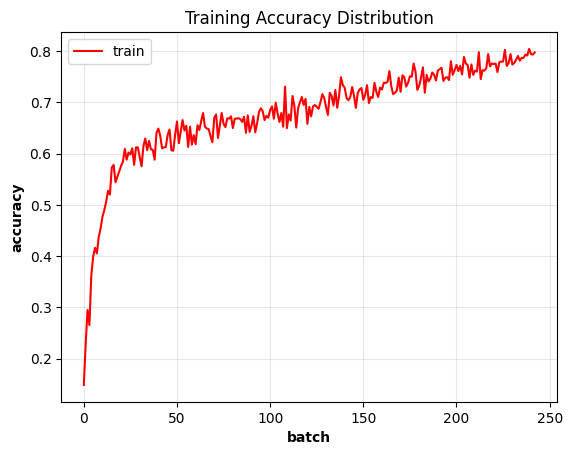

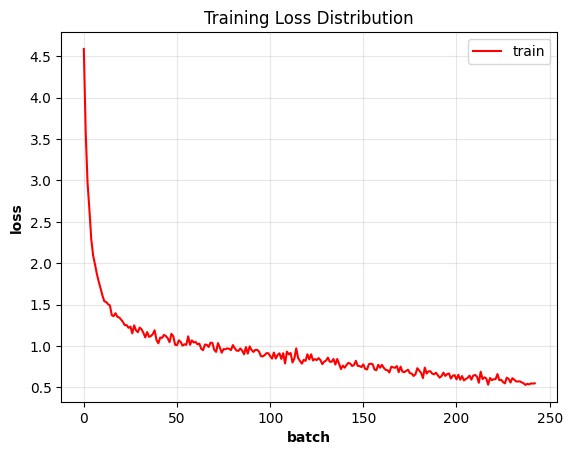

In [8]:
teacher_model.train(train_handler = datahandler_train, test_handler = datahandler_test, limit = 0.99)

##### **Thought Emulator Model**
This model takes the input and predicts the teacher states. We calculate a proxy for accuracy by taking the mean difference in layer states between the teacher model and itself.

  0%|          | 1/243 [00:00<03:27,  1.16it/s]

Step: 0. Loss: 9630.329102. Quasi Training Accuracy: 0.081221.


 10%|█         | 25/243 [00:09<01:17,  2.82it/s]

Step: 24. Loss: 663.079468. Quasi Training Accuracy: 0.732592.


 20%|██        | 49/243 [00:17<01:08,  2.84it/s]

Step: 48. Loss: 419.753540. Quasi Training Accuracy: 0.792672.


 30%|███       | 73/243 [00:26<00:59,  2.85it/s]

Step: 72. Loss: 401.992828. Quasi Training Accuracy: 0.802799.


 40%|███▉      | 97/243 [00:34<00:50,  2.87it/s]

Step: 96. Loss: 382.142334. Quasi Training Accuracy: 0.809614.


 50%|████▉     | 121/243 [00:43<00:42,  2.87it/s]

Step: 120. Loss: 364.000488. Quasi Training Accuracy: 0.815514.


 60%|█████▉    | 145/243 [00:51<00:34,  2.85it/s]

Step: 144. Loss: 312.852753. Quasi Training Accuracy: 0.831188.


 70%|██████▉   | 169/243 [01:00<00:28,  2.63it/s]

Step: 168. Loss: 307.194702. Quasi Training Accuracy: 0.832089.


 79%|███████▉  | 193/243 [01:09<00:19,  2.60it/s]

Step: 192. Loss: 287.330231. Quasi Training Accuracy: 0.837599.


 89%|████████▉ | 217/243 [01:17<00:09,  2.76it/s]

Step: 216. Loss: 273.747681. Quasi Training Accuracy: 0.841560.


 99%|█████████▉| 241/243 [01:26<00:00,  2.81it/s]

Step: 240. Loss: 264.025513. Quasi Training Accuracy: 0.845733.


100%|██████████| 243/243 [01:27<00:00,  2.79it/s]


Evaluating test dataset now...


100%|██████████| 25/25 [00:02<00:00,  8.77it/s]


Loss: 239.988072; Quasi Test Accuracy: 0.864959; Quasi Training Accuracy: 0.842821.
Saving to c:\Users\Luke\multi_implicit_cot\models\thought_emulator


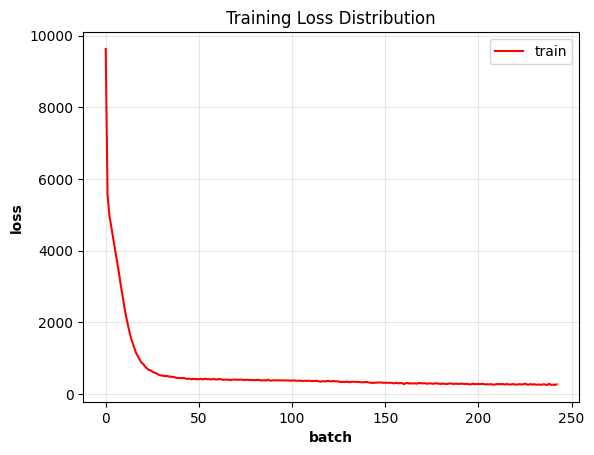

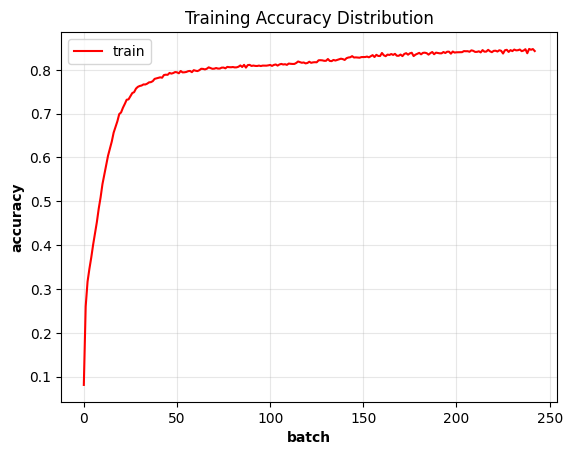

In [9]:
t_emulator_model.train(train_handler = datahandler_train, test_handler = datahandler_test, limit = 0.99)

##### **Mind Reading Emulator Model**
This model takes in the teacher states as input and predicts the output.

  0%|          | 1/243 [00:00<02:10,  1.85it/s]

Step: 0. Loss: 6.206795. Training Accuracy: 0.004464.


 10%|█         | 25/243 [00:09<01:25,  2.55it/s]

Step: 24. Loss: 1.382976. Training Accuracy: 0.511161.


 20%|██        | 49/243 [00:19<01:16,  2.53it/s]

Step: 48. Loss: 1.243930. Training Accuracy: 0.551339.


 30%|███       | 73/243 [00:28<01:05,  2.61it/s]

Step: 72. Loss: 1.132011. Training Accuracy: 0.582589.


 40%|███▉      | 97/243 [00:37<00:54,  2.70it/s]

Step: 96. Loss: 1.013115. Training Accuracy: 0.633929.


 50%|████▉     | 121/243 [00:48<00:55,  2.20it/s]

Step: 120. Loss: 0.943260. Training Accuracy: 0.645089.


 60%|█████▉    | 145/243 [00:59<00:44,  2.22it/s]

Step: 144. Loss: 0.919863. Training Accuracy: 0.658482.


 70%|██████▉   | 169/243 [01:09<00:33,  2.22it/s]

Step: 168. Loss: 0.880102. Training Accuracy: 0.676339.


 79%|███████▉  | 193/243 [01:20<00:22,  2.25it/s]

Step: 192. Loss: 0.847058. Training Accuracy: 0.667411.


 89%|████████▉ | 217/243 [01:31<00:11,  2.26it/s]

Step: 216. Loss: 0.865374. Training Accuracy: 0.674107.


 99%|█████████▉| 241/243 [01:41<00:00,  2.23it/s]

Step: 240. Loss: 0.797600. Training Accuracy: 0.689732.


100%|██████████| 243/243 [01:42<00:00,  2.36it/s]


Evaluating test dataset now...


  4%|▍         | 1/25 [00:05<02:13,  5.57s/it]

Input H. Layer 1, V. Layer 1, first 9 states:
[ 0.3323 -0.0464  0.9191 -0.2496 -0.3378  0.2135 -1.2867 -0.3135 -0.3556]
Target:  #### 0 2 7 1 $$$ 1 9 4 1 
Predicted:  #### 0 4 0 2 $$$ 1 7 2 1 



  8%|▊         | 2/25 [00:11<02:08,  5.61s/it]

Input H. Layer 1, V. Layer 1, first 9 states:
[ 0.3323 -0.0464  0.9191 -0.2496 -0.3378  0.2135 -1.2867 -0.3135 -0.3556]
Target:  #### 0 0 3 6 $$$ 8 8 9 0 
Predicted:  #### 0 5 7 5 $$$ 8 0 5 0 



 12%|█▏        | 3/25 [00:16<02:03,  5.61s/it]

Input H. Layer 1, V. Layer 1, first 9 states:
[ 0.3323 -0.0464  0.9191 -0.2496 -0.3378  0.2135 -1.2867 -0.3135 -0.3556]
Target:  #### 8 6 2 2 $$$ 6 3 9 0 
Predicted:  #### 2 8 0 2 $$$ 6 2 2 0 



 16%|█▌        | 4/25 [00:22<01:58,  5.63s/it]

Input H. Layer 1, V. Layer 1, first 9 states:
[ 0.3323 -0.0464  0.9191 -0.2496 -0.3378  0.2135 -1.2867 -0.3135 -0.3556]
Target:  #### 0 2 7 0 $$$ 8 1 3 0 
Predicted:  #### 5 0 2 0 $$$ 8 0 5 0 



 20%|██        | 5/25 [00:28<01:54,  5.70s/it]

Input H. Layer 1, V. Layer 1, first 9 states:
[ 0.3323 -0.0464  0.9191 -0.2496 -0.3378  0.2135 -1.2867 -0.3135 -0.3556]
Target:  #### 5 9 7 0 $$$ 0 6 3 0 
Predicted:  #### 5 0 0 1 $$$ 0 8 0 0 



 24%|██▍       | 6/25 [00:34<01:48,  5.71s/it]

Input H. Layer 1, V. Layer 1, first 9 states:
[ 0.3323 -0.0464  0.9191 -0.2496 -0.3378  0.2135 -1.2867 -0.3135 -0.3556]
Target:  #### 9 3 4 8 $$$ 2 1 8 0 
Predicted:  #### 2 9 8 8 $$$ 2 2 2 0 



 28%|██▊       | 7/25 [00:39<01:42,  5.72s/it]

Input H. Layer 1, V. Layer 1, first 9 states:
[ 0.3323 -0.0464  0.9191 -0.2496 -0.3378  0.2135 -1.2867 -0.3135 -0.3556]
Target:  #### 0 8 8 2 $$$ 5 6 2 0 
Predicted:  #### 0 9 2 2 $$$ 5 5 0 0 



 32%|███▏      | 8/25 [00:45<01:37,  5.72s/it]

Input H. Layer 1, V. Layer 1, first 9 states:
[ 0.3323 -0.0464  0.9191 -0.2496 -0.3378  0.2135 -1.2867 -0.3135 -0.3556]
Target:  #### 9 2 7 0 $$$ 6 5 0 1 
Predicted:  #### 1 8 0 0 $$$ 6 3 3 1 



 36%|███▌      | 9/25 [00:51<01:31,  5.72s/it]

Input H. Layer 1, V. Layer 1, first 9 states:
[ 0.3323 -0.0464  0.9191 -0.2496 -0.3378  0.2135 -1.2867 -0.3135 -0.3556]
Target:  #### 4 9 4 2 $$$ 3 5 6 4 
Predicted:  #### 2 8 2 2 $$$ 3 9 2 4 



 40%|████      | 10/25 [00:56<01:25,  5.73s/it]

Input H. Layer 1, V. Layer 1, first 9 states:
[ 0.3323 -0.0464  0.9191 -0.2496 -0.3378  0.2135 -1.2867 -0.3135 -0.3556]
Target:  #### 1 2 2 7 $$$ 4 5 0 0 
Predicted:  #### 5 8 8 5 $$$ 4 0 0 0 



 44%|████▍     | 11/25 [01:02<01:20,  5.72s/it]

Input H. Layer 1, V. Layer 1, first 9 states:
[ 0.3323 -0.0464  0.9191 -0.2496 -0.3378  0.2135 -1.2867 -0.3135 -0.3556]
Target:  #### 4 5 6 3 $$$ 0 9 4 0 
Predicted:  #### 2 2 2 2 $$$ 0 5 2 0 



 48%|████▊     | 12/25 [01:08<01:14,  5.71s/it]

Input H. Layer 1, V. Layer 1, first 9 states:
[ 0.3323 -0.0464  0.9191 -0.2496 -0.3378  0.2135 -1.2867 -0.3135 -0.3556]
Target:  #### 0 6 3 7 $$$ 0 6 1 6 
Predicted:  #### 0 8 8 5 $$$ 0 8 8 6 



 52%|█████▏    | 13/25 [01:13<01:07,  5.66s/it]

Input H. Layer 1, V. Layer 1, first 9 states:
[ 0.3323 -0.0464  0.9191 -0.2496 -0.3378  0.2135 -1.2867 -0.3135 -0.3556]
Target:  #### 0 2 1 3 $$$ 0 6 6 0 
Predicted:  #### 0 8 0 3 $$$ 0 5 0 0 



 56%|█████▌    | 14/25 [01:19<01:02,  5.64s/it]

Input H. Layer 1, V. Layer 1, first 9 states:
[ 0.3323 -0.0464  0.9191 -0.2496 -0.3378  0.2135 -1.2867 -0.3135 -0.3556]
Target:  #### 4 4 1 1 $$$ 4 2 3 0 
Predicted:  #### 2 2 1 1 $$$ 4 0 0 0 



 60%|██████    | 15/25 [01:25<00:56,  5.68s/it]

Input H. Layer 1, V. Layer 1, first 9 states:
[ 0.3323 -0.0464  0.9191 -0.2496 -0.3378  0.2135 -1.2867 -0.3135 -0.3556]
Target:  #### 8 6 7 1 $$$ 4 7 5 0 
Predicted:  #### 2 0 2 2 $$$ 4 0 4 0 



 64%|██████▍   | 16/25 [01:30<00:50,  5.67s/it]

Input H. Layer 1, V. Layer 1, first 9 states:
[ 0.3323 -0.0464  0.9191 -0.2496 -0.3378  0.2135 -1.2867 -0.3135 -0.3556]
Target:  #### 0 2 2 3 $$$ 0 2 5 5 
Predicted:  #### 0 7 3 2 $$$ 0 8 0 6 



 68%|██████▊   | 17/25 [01:36<00:45,  5.70s/it]

Input H. Layer 1, V. Layer 1, first 9 states:
[ 0.3323 -0.0464  0.9191 -0.2496 -0.3378  0.2135 -1.2867 -0.3135 -0.3556]
Target:  #### 6 7 3 5 $$$ 3 5 5 7 
Predicted:  #### 2 8 5 5 $$$ 3 2 9 7 



 72%|███████▏  | 18/25 [01:42<00:40,  5.81s/it]

Input H. Layer 1, V. Layer 1, first 9 states:
[ 0.3323 -0.0464  0.9191 -0.2496 -0.3378  0.2135 -1.2867 -0.3135 -0.3556]
Target:  #### 6 7 9 2 $$$ 6 5 6 1 
Predicted:  #### 2 0 2 3 $$$ 6 0 2 1 



 76%|███████▌  | 19/25 [01:48<00:34,  5.82s/it]

Input H. Layer 1, V. Layer 1, first 9 states:
[ 0.3323 -0.0464  0.9191 -0.2496 -0.3378  0.2135 -1.2867 -0.3135 -0.3556]
Target:  #### 9 7 4 2 $$$ 6 5 4 0 
Predicted:  #### 2 3 2 2 $$$ 6 0 2 0 



 80%|████████  | 20/25 [01:54<00:28,  5.76s/it]

Input H. Layer 1, V. Layer 1, first 9 states:
[ 0.3323 -0.0464  0.9191 -0.2496 -0.3378  0.2135 -1.2867 -0.3135 -0.3556]
Target:  #### 5 3 4 0 $$$ 2 3 4 0 
Predicted:  #### 5 0 2 0 $$$ 2 2 2 0 



 84%|████████▍ | 21/25 [01:59<00:22,  5.68s/it]

Input H. Layer 1, V. Layer 1, first 9 states:
[ 0.3323 -0.0464  0.9191 -0.2496 -0.3378  0.2135 -1.2867 -0.3135 -0.3556]
Target:  #### 2 1 9 0 $$$ 2 4 3 0 
Predicted:  #### 2 2 0 1 $$$ 2 9 1 0 



 88%|████████▊ | 22/25 [02:05<00:16,  5.63s/it]

Input H. Layer 1, V. Layer 1, first 9 states:
[ 0.3323 -0.0464  0.9191 -0.2496 -0.3378  0.2135 -1.2867 -0.3135 -0.3556]
Target:  #### 2 0 0 4 $$$ 0 8 6 3 
Predicted:  #### 2 8 5 4 $$$ 0 8 0 4 



 92%|█████████▏| 23/25 [02:10<00:11,  5.64s/it]

Input H. Layer 1, V. Layer 1, first 9 states:
[ 0.3323 -0.0464  0.9191 -0.2496 -0.3378  0.2135 -1.2867 -0.3135 -0.3556]
Target:  #### 0 8 4 4 $$$ 6 5 7 0 
Predicted:  #### 0 8 2 4 $$$ 6 0 8 0 



 96%|█████████▌| 24/25 [02:16<00:05,  5.56s/it]

Input H. Layer 1, V. Layer 1, first 9 states:
[ 0.3323 -0.0464  0.9191 -0.2496 -0.3378  0.2135 -1.2867 -0.3135 -0.3556]
Target:  #### 8 5 2 1 $$$ 2 5 9 1 
Predicted:  #### 2 7 0 1 $$$ 2 3 0 1 



100%|██████████| 25/25 [02:16<00:00,  5.46s/it]

Input H. Layer 1, V. Layer 1, first 9 states:
[ 0.3323 -0.0464  0.9191 -0.2496 -0.3378  0.2135 -1.2867 -0.3135 -0.3556]
Target:  #### 0 8 4 6 $$$ 4 1 1 0 
Predicted:  #### 0 0 9 5 $$$ 4 0 0 0 

Perplexitity: 2.146523; Test Accuracy: 0.001299; Training Accuracy: 0.701206.
Saving to c:\Users\Luke\multi_implicit_cot\models\mindreading_emulator


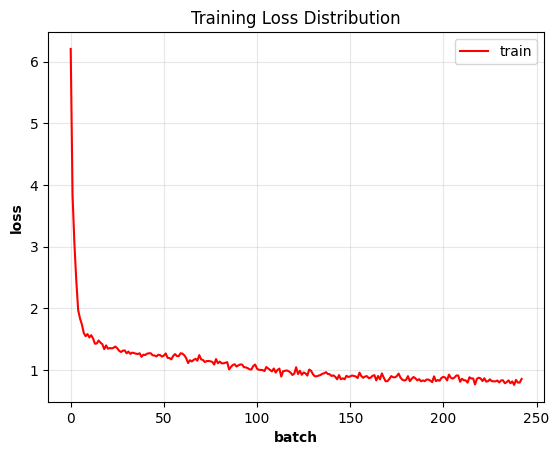

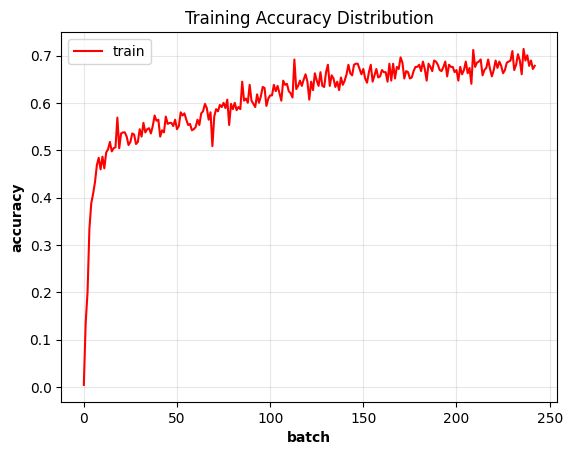

In [10]:
mr_emulator_model.train(train_handler = datahandler_train, test_handler = datahandler_test, limit = 0.99)

### **Prediction Demo**
Here we generate our custom test case to see results for each model. We include both the **thought emulator** and **mind reading emulator** to see how well it maps to states.

---

In [11]:
teacher_model.predict(custom_prediction)

100%|██████████| 1/1 [00:00<00:00,  2.05it/s]

Input:  0 1 * 5 0 $$$ 9 0 * 8 9 
Target:  0 5 0 + 0 0 0 0 $$$ 2 7 0 + 0 1 8 0  #### 0 5 0 0 $$$ 2 8 8 0 
Predicted:  0 5 0 + 0 0 0 0 $$$ 2 7 0 + 0 1 7 0  #### 0 5 0 0 $$$ 2 8 7 0 



In [15]:
t_emulator_model.predict(custom_prediction)

100%|██████████| 1/1 [00:00<00:00,  3.38it/s]

Input:  0 1 * 5 0 $$$ 9 0 * 8 9  
Target H. Layer 1, V. Layer 1, first 9 states:
[ 0.3323 -0.0464  0.9191 -0.2496 -0.3378  0.2135 -1.2867 -0.3135 -0.3556]
Predicted H. Layer 1, V. Layer 1, first 9 states: 
[ 0.2965 -0.0205  0.9547 -0.2495 -0.3151  0.2282 -1.2605 -0.3083 -0.3336]


In [14]:
mr_emulator_model.predict(custom_prediction)

100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

Input H. Layer 1, V. Layer 1, first 9 states:
[ 0.3323 -0.0464  0.9191 -0.2496 -0.3378  0.2135 -1.2867 -0.3135 -0.3556]
Target:  #### 0 5 0 0 $$$ 2 8 8 0 
Predicted:  #### 0 1 0 0 $$$ 2 2 9 0 

